In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pynucastro as pyrl

# Integration Example

We can use [pynucastro](https://github.com/pynucastro/pynucastro) to generate the righthand side function for an astrophysical reaction network.

We'll create a CNO network that has the rates for all 4 CNO cycles + hot-CNO, as listed here:
[https://reaclib.jinaweb.org/popularRates.php](https://reaclib.jinaweb.org/popularRates.php)

In [21]:
files = ["c12-pg-n13-ls09",
         "c13-pg-n14-nacr",
         "n13--c13-wc12",
         "n13-pg-o14-lg06",
         "n14-pg-o15-im05",
         "n15-pa-c12-nacr",
         "o14--n14-wc12",
         "o15--n15-wc12",
         "n15-pg-o16-li10",
         "o16-pg-f17-ia08",
         "f17--o17-wc12",
         "o17-pa-n14-il10",
         "o17-pg-f18-il10",
         "f18--o18-wc12",
         "o18-pa-n15-il10",
         "o18-pg-f19-il10",
         "f19-pa-o16-nacr",
         "o14-ap-f17-Ha96c",
         "f17-pg-ne18-cb09",
         "ne18--f18-wc12",
         "f18-pa-o15-il10"]
rc = pyrl.RateCollection(files)

We can visualize the network and rates linking the nuclei

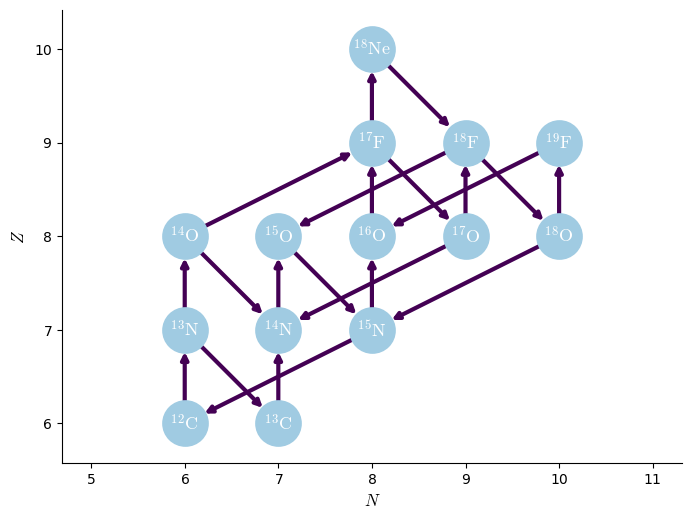

In [22]:
rc.plot()

pynucastro can write out the python code needed to evaluate the reaction rates

In [23]:
pynet = pyrl.PythonNetwork(files)
pynet.write_network("cno_integration_example.py")

In [31]:
%cat cno_integration_example.py

import numpy as np
from pynucastro.rates import Tfactors
import numba

ip = 0
ihe4 = 1
ic12 = 2
ic13 = 3
in13 = 4
in14 = 5
in15 = 6
io14 = 7
io15 = 8
io16 = 9
io17 = 10
io18 = 11
if17 = 12
if18 = 13
if19 = 14
ine18 = 15
nnuc = 16

A = np.zeros((nnuc), dtype=np.int32)

A[ip] = 1
A[ihe4] = 4
A[ic12] = 12
A[ic13] = 13
A[in13] = 13
A[in14] = 14
A[in15] = 15
A[io14] = 14
A[io15] = 15
A[io16] = 16
A[io17] = 17
A[io18] = 18
A[if17] = 17
A[if18] = 18
A[if19] = 19
A[ine18] = 18

Z = np.zeros((nnuc), dtype=np.int32)

Z[ip] = 1
Z[ihe4] = 2
Z[ic12] = 6
Z[ic13] = 6
Z[in13] = 7
Z[in14] = 7
Z[in15] = 7
Z[io14] = 8
Z[io15] = 8
Z[io16] = 8
Z[io17] = 8
Z[io18] = 8
Z[if17] = 9
Z[if18] = 9
Z[if19] = 9
Z[ine18] = 10

names = []
names.append("h1")
names.append("he4")
names.append("c12")
names.append("c13")
names.append("n13")
names.append("n14")
names.append("n15")
names.append("o14")
names.append("o15")
names.append("o16")
names.append("o17")
names.append("o18")
names.append("f17")
names.append("f18")
name

Now we can import the network that was just created

In [24]:
import cno_integration_example as cno

We'll use the BDF solver from SciPy

In [25]:
from scipy.integrate import solve_ivp

Now we'll set the thermodynamic conditions.  We initialize mass fractions and then convert to molar fractions, since that's what the RHS uses

In [26]:
rho = 150
T = 1.5e7

X0 = np.zeros(cno.nnuc)
X0[cno.ip] = 0.7
X0[cno.ihe4] = 0.28
X0[cno.ic12] = 0.02

Y0 = X0/cno.A

In [27]:
Y0

array([0.7       , 0.07      , 0.00166667, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [28]:
tmax = 1.e20

sol = solve_ivp(cno.rhs, [0, tmax], Y0, method="BDF",
                dense_output=True, args=(rho, T), rtol=1.e-6, atol=1.e-6)

In [29]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 345
     njev: 20
      nlu: 63
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f54490ee5b0>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 2.00000000e-04, 1.20000000e-03,
       2.20000000e-03, 1.22000000e-02, 2.22000000e-02, 1.22200000e-01,
       2.22200000e-01, 1.22220000e+00, 2.22220000e+00, 1.22222000e+01,
       2.22222000e+01, 1.22222200e+02, 2.22222200e+02, 1.22222220e+03,
       2.22222220e+03, 1.22222222e+04, 2.22222222e+04, 1.22222222e+05,
       2.22222222e+05, 1.22222222e+06, 2.22222222e+06, 1.22222222e+07,
       2.22222222e+07, 1.22222222e+08, 2.22222222e+08, 1.22222222e+09,
       2.22222222e+09, 1.22222222e+10, 2.22222222e+10, 1.22222222e+11,
       2.22222222e+11, 1.18930639e+12, 2.15639055e+12, 3.12347472e+12,
       5.88239225e+12, 8.64130978e+12, 1.14002273e+13, 1.41591448e+13,
       1.91252701e+13, 2.40913954e+13, 2.905752

Now we can plot the mass fractions.

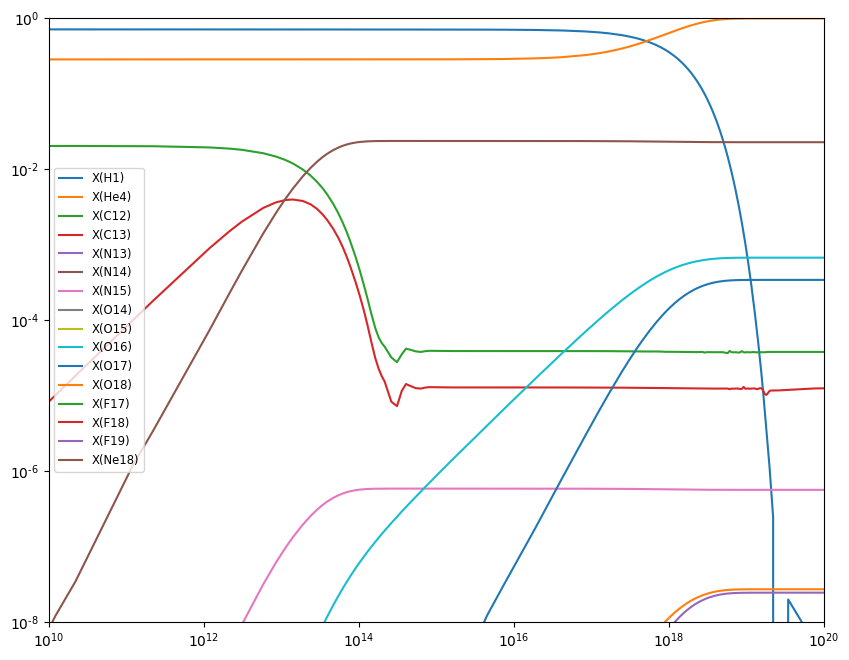

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)

for n in range(cno.nnuc):
    ax.loglog(sol.t, sol.y[n,:] * cno.A[n], label=f"X({cno.names[n].capitalize()})")

ax.set_xlim(1.e10, 1.e20)
ax.set_ylim(1.e-8, 1.0)
ax.legend(fontsize="small")

fig.set_size_inches((10, 8))